Mounted at /content/drive
Python 3.10.12
defaultdict(<function QLearningAgent.__init__.<locals>.<lambda> at 0x7dbe92ae31c0>, {'None': [4.008615129898009, -99.9096922826311, -99.90999680940925, -99.90999958123683], "[7, 0, '1111']": [-7.571926050311808, -99.909999980088, 0.10396632306923274, 4.252079775842896], "[6, 1, '1111']": [0.4144012957459139, 2.180678688632506, 0.5067836790670547, 0.6978801553908149], "[6, 0, '1110']": [1.7189303410610581, -99.90948875665576, 1.7018974521214227, 4.5253183289054135], "[6, -1, '1000']": [0.1, 0.1, 0.1, 0.1], "[6, 1, '0011']": [-0.6262533558496247, 1.6493885451654569, -8.047114144386233, -9.818069464250593], "[7, 0, '1101']": [-1.0586917566993412, -27.247667023416344, 0.09601900000000001, 1.3698636964106623], "[7, -1, '1000']": [0.1, 0.1, 0.1, 0.1], "[5, 0, '1110']": [-9.01805920041456, -99.9096922826311, 1.560832848018363, 4.843197377144445], "[6, 0, '1100']": [0.8201381938415154, -86.78374609839604, 0.7917765293116403, 2.4693196209433856], "[6, 2,

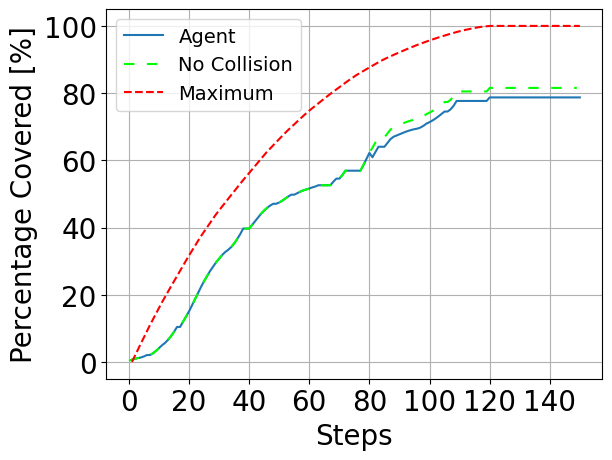

In [24]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Update the path based on the location of your file
#file_path = '/content/drive/My Drive/ColabNotebooks/5qlearning/environment.py'

# Add the directory containing the file to sys.path
import sys
sys.path.append('/content/drive/My Drive/ColabNotebooks/5qlearning')
#sys.path.append('/usr/local/lib/python3.7/site-packages/')

!python3 --version
!pip install pybullet
!pip install gymnasium
!pip install urdfpy

import numpy as np
import random
import pybullet as p
from nopunenvironmenttt import Env
from collections import defaultdict
import os
import matplotlib.pyplot as plt
import math
import pandas as pd
cwd = os.getcwd() # Get the current working directory (cwd)
files = os.listdir(cwd) # Get all the files in that directory
from ast import literal_eval
import csv

def import_from_csv(filename):
    data = defaultdict(str)  # Change int to the appropriate type for your values

    with open(filename, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)

        # Skip header
        next(csv_reader)

        # Read data
        for row in csv_reader:
            key, value = row
            data[key] = literal_eval(value)  # Change int to the appropriate type for your values

    return data

#global lr
lr=0
#global df
df=0
#global eps
eps=0
#global number_of_steps
number_of_steps = 1
global ij
ij=0

global continuous_coord_x
continuous_coord_x=[]
global continuous_coord_y
continuous_coord_y=[]



reward=0

directory_path = '/content/drive/My Drive/ColabNotebooks/5qlearning/Q_tables/'
directory_files = os.listdir(directory_path)
i=0
#df = pd.Dataframe()

filename='30RP3_0.3981_0.9_0.3162_3000.csv'
#filename='04RP3_0.7943282347242815_0.9_0.0032_3000.csv'


class QLearningAgent:
    def __init__(self, actions):
        # actions = [0, 1, 2, 3]
        global lr
        global df
        global eps
        self.actions = actions
        self.learning_rate = lr #was 0.01
        self.discount_factor = df #was 0.9
        self.epsilon = eps# was 0.1
        #self.q_table = defaultdict(lambda: [0.0, 0.0, 0.0, 0.0])
        PREVIOUSQ=import_from_csv(os.path.join(directory_path, filename))
        self.q_table = defaultdict(lambda: [0.1, 0.1, 0.1, 0.1], PREVIOUSQ)

        ##################################################
        global qarr
        qarr=self.q_table

    # update q function with sample <s, a, r, s'>
    def learn(self, state, action, reward, next_state):
        current_q = self.q_table[state][action]
        #print(state)
        xx=7
        yy=0
        if state!="None":


          global ij
          g=plt.figure(filename+"1")
          ij=ij+1
          #xx=int(state[1])
          #yy=int(state[4])
          if state[3]==",":
            xx=int(str(state[1]+state[2]))
            if state[6]==",":
              yy=int(state[5])
            else:
              yy=int(str(state[5]+state[6]))

          else:
            xx=int(state[1])
            if state[5]==",":
              yy=int(state[4])
            else:
              yy=int(str(state[4]+state[5]))


        global continuous_coord_x
        global continuous_coord_y

        continuous_coord_x= np.concatenate((continuous_coord_x, [xx]))
        continuous_coord_y= np.concatenate((continuous_coord_y, [yy]))
          #print(xx, yy)


        # using Bellman Optimality Equation to update q function
        new_q = reward + self.discount_factor * max(self.q_table[next_state])
        self.q_table[state][action] += self.learning_rate * (new_q - current_q)
        global qarr
        qarr=self.q_table
        #print(self.q_table)

    # get action for the state according to the q function table
    # agent pick action of epsilon-greedy policy
    def get_action(self, state):
        #self.epsilon=self.epsilon*0.99995
        if np.random.rand() < self.epsilon:
            # take random action
            action = np.random.choice(self.actions)
        else:
            # take action according to the q function table
            state_action = self.q_table[state]
            action = self.arg_max(state_action)
        return action

    @staticmethod
    def arg_max(state_action):
        max_index_list = []
        max_value = state_action[0]
        for index, value in enumerate(state_action):
            if value > max_value:
                max_index_list.clear()
                max_value = value
                max_index_list.append(index)
            elif value == max_value:
                max_index_list.append(index)
        return random.choice(max_index_list)

    def q_table(self):
        print(self.q_table)



if __name__ == "__main__":
    env = Env()
    agent = QLearningAgent(actions=list(range(env.n_actions)))

    #global qarr
    print(qarr)


    continuous_coord_x=[]
    continuous_coord_y=[]



    for episode in range(number_of_steps):
        state = env.reset()



        #global number_of_steps######################################
        n=160
        mr=0.7064
        local_reward_plot=[]
        for trial in range(n):
            env.render()

            # take action and proceed one step in the environment
            action = agent.get_action(str(state))
            next_state, reward, done, reward_sum = env.step(action)


            # with sample <s,a,r,s'>, agent learns new q function
            agent.learn(str(state), action, reward, str(next_state))

            state = next_state
            #env.print_value_all(agent.q_table)

            local_reward_plot = np.concatenate((local_reward_plot, [reward_sum]))

            if trial==n-1:
                done=True

            # if episode ends, then break
            if done:

                print("episode:", episode, "   trials completed:", trial, "    reward:", reward_sum/mr, "%")




                break

fs=20

data = pd.read_csv('/content/drive/My Drive/ColabNotebooks/5qlearning/max_theoretical.csv')
data2 = pd.read_csv('/content/drive/My Drive/ColabNotebooks/5qlearning/moved_reward_sameq/south.csv')

f=plt.figure(1)
plt.plot(range(1, 151, 1), data2[0:150]/100)
plt.plot(range(0, 150, 1), local_reward_plot[0:150]/mr, color='lime', linestyle=(0, (5, 6)))
plt.plot(np.linspace(1, 150, 151), data.iloc[0], color='r', linestyle='dashed')

print(data2[0:1], local_reward_plot[0])

plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.xlabel("Steps", fontsize=fs)
plt.ylabel("Percentage Covered [%]", fontsize=fs)
plt.legend(["Agent", "No Collision", "Maximum"], fontsize=14, loc='upper left' )
plt.grid()

f.show()


